#### Twin axes using axisartst and axesgrid1 toolkits

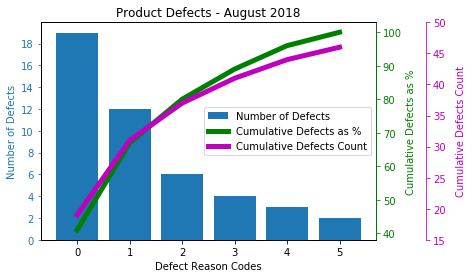

In [1]:
## Scales change while zooming with a back end during interactive analysis
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# move the spine of the second axes outwards
ax3.spines["right"].set_position(("axes", 1.15))

x = [0, 1, 2, 3, 4, 5]
y = [19, 12, 6, 4, 3, 2]
b = ax1.bar(x, y, label='Number of Defects')

y1 = [41, 67, 80, 89, 96, 100]
l, = ax2.plot(x, y1, color='g', lw=5, label='Cumulative Defects as %')

y2 = [19, 31, 37, 41, 44, 46]
l1, = ax3.plot(x, y2, color='m', lw=5, label='Cumulative Defects Count')

majorLocator = MultipleLocator(2)
ax1.yaxis.set_major_locator(majorLocator)

ax1.set(xlabel='Defect Reason Codes', ylabel='Number of Defects')
ax2.set(ylabel='Cumulative Defects as %')
ax3.set_ylim(15,50)
ax3.set_ylabel('Cumulative Defects Count', labelpad=10)

graphs = [b, l, l1]
ax1.legend(graphs, [g.get_label() for g in graphs], loc=5)
ax1.set_title('Product Defects - August 2018')

# set color for the labels
ax1.yaxis.label.set_color(b.patches[0].get_facecolor())
ax2.yaxis.label.set_color(l.get_color())
ax3.yaxis.label.set_color(l1.get_color())

# set color for both right axes
ax2.spines["right"].set_edgecolor(l.get_color())
ax3.spines["right"].set_edgecolor(l1.get_color())

# set the color for ticks and ticklabels. This does not work with AA, it sets color for only ticks, not ticklabels!!!
ax1.tick_params(axis='y', colors=b.patches[0].get_facecolor())
ax2.tick_params(axis='y', colors=l.get_color())
ax3.tick_params(axis='y', colors=l1.get_color())

plt.show()

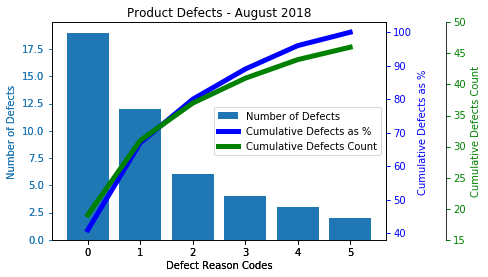

In [10]:
## For interactive analysis, new axes scales don't change along with main X and Y axis!
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

plt.figure()
ax1 = host_subplot(111, axes_class=AA.Axes)

ax1.axis["top"].toggle(all=False)           # switch off ticks and tick labels for the top axis

ax2 = ax1.twinx()
ax3 = ax1.twinx()

new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
ax3.axis["right"] = new_fixed_axis(loc="right",
                                    axes=ax3,
                                    offset=(60, 0))

ax2.axis["right"].toggle(all=True)
ax3.axis["right"].toggle(all=True)

ax1.set_xlabel('Defect Reason Codes')
ax1.set_ylabel('Number of Defects')
ax2.set_ylabel('Cumulative Defects as %')
ax3.set_ylabel('Cumulative Defects Count')

x = [0, 1, 2, 3, 4, 5]
y = [19, 12, 6, 4, 3, 2]
y1 = [41, 67, 80, 89, 96, 100]
y2 = [19, 31, 37, 41, 44, 46]

b = ax1.bar(x, y, label='Number of Defects')
l, = ax2.plot(x, y1, lw=5, label='Cumulative Defects as %', color='b')
l1, = ax3.plot(x, y2, lw=5, label='Cumulative Defects Count', color='g')

ax3.set_ylim(15, 50)

ax1.legend(loc=5)
ax1.set_title('Product Defects - August 2018')

ax1.axis["left"].label.set_color(b.patches[0].get_facecolor())
ax2.axis["right"].label.set_color(l.get_color())
ax3.axis["right"].label.set_color(l1.get_color())

ax1.axis["left"].major_ticks.set_color(b.patches[0].get_facecolor())
ax2.axis["right"].major_ticks.set_color(l.get_color())
ax3.axis["right"].major_ticks.set_color(l1.get_color())

ax1.axis["left"].major_ticklabels.set_color(b.patches[0].get_facecolor())
ax2.axis["right"].major_ticklabels.set_color(l.get_color())
ax3.axis["right"].major_ticklabels.set_color(l1.get_color())

# setting the color for axis itself is not working in AA
ax2.spines["right"].set_color(l.get_color())   
ax3.spines["right"].set_color(l1.get_color())

ax1.axis[:].major_ticks.set_tick_out(True)
ax2.axis[:].major_ticks.set_tick_out(True)
ax3.axis[:].major_ticks.set_tick_out(True)

plt.show()

#### Using AxesDivider for plotting a scatter plot and associated histograms

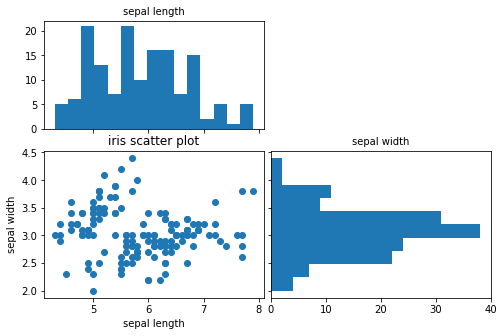

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

iris = pd.read_csv('iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})
x, y = iris['sepal_length'],  iris['sepal_width']

fig, axmain = plt.subplots(figsize=(8, 6))

axmain.scatter(x, y)
axmain.set_aspect(1.)

#height of top histogram = 1.5 inches
# width of right histogram = 100% of width of main scatter plot
divider = make_axes_locatable(axmain)
axtop = divider.append_axes("top", size=1.5, pad="15%", sharex=axmain)
axright = divider.append_axes("right", "100%", 0.1, sharey=axmain)

# make labels invisible,where the axis is shared
axtop.xaxis.set_tick_params(labelbottom=False)
axright.yaxis.set_tick_params(labelleft=False)

axtop.hist(x, bins=15)
axright.hist(y, bins=10, orientation='horizontal')

axtop.set_yticks([0, 5, 10, 15, 20])
axright.set_xticks([0, 10, 20, 30, 40])

axmain.set(xlabel='sepal length', ylabel='sepal width', title='iris scatter plot')
axtop.set_title('sepal length', size=10)
axright.set_title('sepal width', size=10)

plt.show()

#### Using AxesDivider for  plotting colorbar

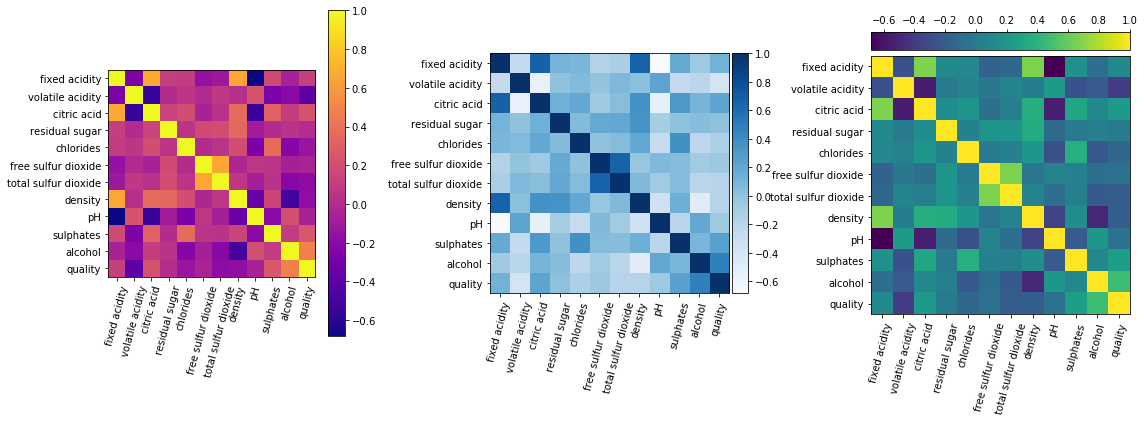

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

wine_quality = pd.read_csv('winequality.csv', delimiter=';')
corr_wine = wine_quality.corr()

fig = plt.figure(1, (16., 6.))

plt.subplot(131)
plt.imshow(corr_wine, cmap='plasma')
plt.colorbar()
plt.xticks(range(len(corr_wine)),corr_wine.columns, rotation=75)
plt.yticks(range(len(corr_wine)),corr_wine.columns)

ax2 = plt.subplot(132)
im1 = ax2.imshow(corr_wine, cmap='Blues')
ax2_divider = make_axes_locatable(ax2)
cax1 = ax2_divider.append_axes("right", size="7%", pad=0.03)
plt.colorbar(im1, cax=cax1)
ax2.set_xticks(range(len(corr_wine)))
ax2.set_xticklabels(corr_wine.columns, rotation=75)
ax2.set(yticks=range(len(corr_wine)), yticklabels=corr_wine.columns)

ax3 = plt.subplot(133)
im2 = ax3.imshow(corr_wine)
ax3_divider = make_axes_locatable(ax3)
cax2 = ax3_divider.append_axes("top", size="7%", pad="2%")
cb2 = plt.colorbar(im2, cax=cax2, orientation="horizontal")
cax2.xaxis.set_ticks_position("top")
ax3.set_xticks(range(len(corr_wine)))
ax3.set_xticklabels(corr_wine.columns, rotation=75)
ax3.set(yticks=range(len(corr_wine)), yticklabels=corr_wine.columns)

plt.tight_layout(w_pad=-1)

plt.show()

#### Using ImageGrid for plotting images with colorbar in a grid

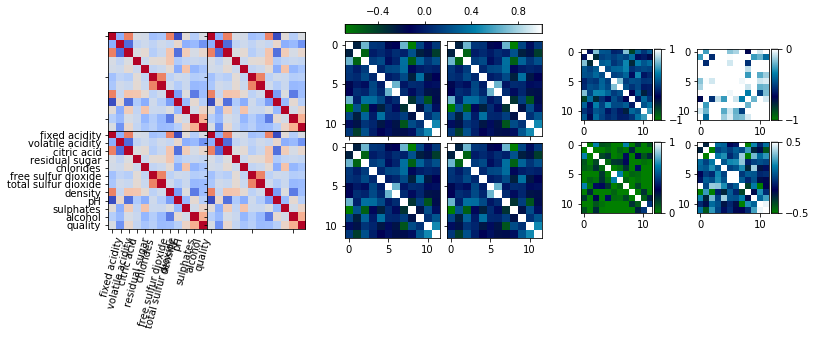

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd

wine_quality = pd.read_csv('winequality.csv', delimiter=';')
corr_wine = wine_quality.corr()

images = []
images.append(corr_wine)
images.append(corr_wine)
images.append(corr_wine)
images.append(corr_wine)

fig = plt.figure(1, (12, 8.))

grid1 = ImageGrid(fig, 131,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.0,  # pad between axes in inch.
                 label_mode="1") # print ticklabels only for lower left corner plot 
                 
grid1.axes_llc.set_xticks(range(len(corr_wine)))
grid1.axes_llc.set_xticklabels(corr_wine.columns, rotation=75)
grid1.axes_llc.set(yticks=range(len(corr_wine)), yticklabels=corr_wine.columns)

for i in range(4):
    gd = grid1[i].imshow(images[i], cmap='coolwarm')  # The AxesGrid object work as a list of axes.

grid2 = ImageGrid(fig, 132,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 label_mode="L", # Print ticklabels for left and bottom images that form L shape, just leave out top right corner 
                 cbar_location="top",   #it can be "right" also to place it on the right of the grid
                 cbar_mode="single") # print only one colorbar on top of the grid

#"viridis" is the default colormap
for i in range(4):
    im = grid2[i].imshow(images[i], cmap='ocean')  # The AxesGrid object work as a list of axes.
grid2.cbar_axes[0].colorbar(im)   
                  
grid3 = ImageGrid(fig, 133,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=(0.5, 0.3), # pad between axes in inch.
                 label_mode="0",  # print labels for all the images
                 cbar_location="right", # This can be "top" also, then set_yticks should be changed to set_xticks for colorbar below
                 cbar_mode="each", # print colorbar for every image on their right side
                 cbar_size="10%",  # width of colorbar is 10% of width of the image axes
                 cbar_pad="3%")    # padding between the image and colorbar is 3% of width of image axes
                 
limits = ((-1, 1), (-1, 0), (0, 1.), (-0.5, 0.5))
for i in range(4):
    im = grid3[i].imshow(images[i], interpolation="nearest", 
                         vmin=limits[i][0], vmax=limits[i][1], cmap='ocean')  # The AxesGrid object work as a list of axes.
    grid3.cbar_axes[i].colorbar(im)  
    grid3.cbar_axes[i].set_yticks((limits[i][0], limits[i][1])) #limit colorbar ticks to min and max,comment this line for default

plt.show()

#### Using inset_locator for zooming an image

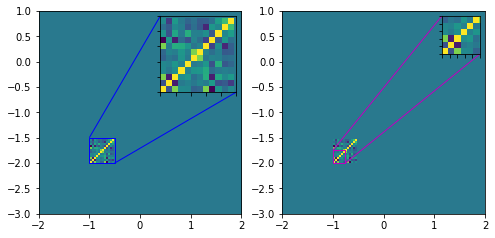

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[8, 4])

wine_quality = pd.read_csv('winequality.csv', delimiter=';')
corr_wine = wine_quality.corr()

# prepare the demo image

extended_image = np.zeros([100, 100], dtype="d")   #double precision floating point number
nx, ny = corr_wine.shape
extended_image[25:25 + nx, 25:25 + ny] = corr_wine

extent = [-2, 2, -3, 1]
ax1.imshow(extended_image, extent=extent, interpolation="nearest", origin="lower")

axins1 = zoomed_inset_axes(ax1, 3, loc=1)  # zoom = 3
axins1.imshow(extended_image, extent=extent, interpolation="nearest", origin="lower")

# a portion of the original image
axins1.set_xlim(-1.0, -0.5)
axins1.set_ylim(-2.0, -1.5)

# fix the number of ticks on the inset axes
axins1.xaxis.get_major_locator().set_params(nbins=8)
axins1.yaxis.get_major_locator().set_params(nbins=8)

plt.xticks(visible=False)
plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax1, axins1, loc1=2, loc2=4, fc="none", ec="b")

ax2.imshow(extended_image, extent=extent, interpolation="nearest",
          origin="lower")

axins2 = zoomed_inset_axes(ax2, 3, loc=1)  # zoom = 3
axins2.imshow(extended_image, extent=extent, interpolation="nearest", origin="lower")

axins2.set_xlim(-1.0, -0.75)
axins2.set_ylim(-2.0, -1.75)

axins2.yaxis.get_major_locator().set_params(nbins=8)
axins2.xaxis.get_major_locator().set_params(nbins=8)

plt.xticks(visible=False)
plt.yticks(visible=False)

mark_inset(ax2, axins2, loc1=2, loc2=4, fc="none", ec="m")

plt.show()

#### Using inset_locator for plotting inset axes

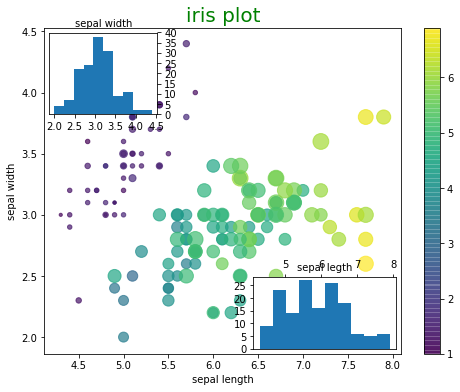

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

iris = pd.read_csv('iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})
x, y = iris['sepal_length'],  iris['sepal_width']

plt.figure(1, (8., 6.))
ax = plt.subplot(111)

im = ax.scatter(x, y, c=iris.petal_length, s=100*iris.petal_width, cmap='viridis', alpha=0.7)
plt.colorbar(im)

# width is 40% of parent axes, height = 1. inch
inset_ax1 = inset_axes(ax, width="40%", height=1., loc=4)

inset_ax1.hist(iris.sepal_length)

inset_ax1.set_title('sepal legth', size=10, pad=20)
inset_ax1.axis["bottom"].toggle(all=False)
inset_ax1.axis["top"].toggle(all=True)
inset_ax1.xaxis.get_major_locator().set_params(nbins=5)
inset_ax1.yaxis.get_major_locator().set_params(nbins=10)

# second inset axes
#inset_ax2 = zoomed_inset_axes(ax, zoom=.5, loc=4)   # since highest frequency is 38, it is showing too tall bars out of sync!
inset_ax2 = inset_axes(ax, width=1.5, height="25%", loc=2)

inset_ax2.hist(iris.sepal_width)

inset_ax2.set_title('sepal width', size=10)
inset_ax2.axis["left"].toggle(all=False)
inset_ax2.axis["right"].toggle(all=True)
inset_ax2.xaxis.get_major_locator().set_params(nbins=6)
inset_ax2.yaxis.get_major_locator().set_params(nbins=10)

ax.set(xlabel='sepal length', ylabel='sepal width')
ax.set_title('iris plot', size=20, color='g')

plt.show()

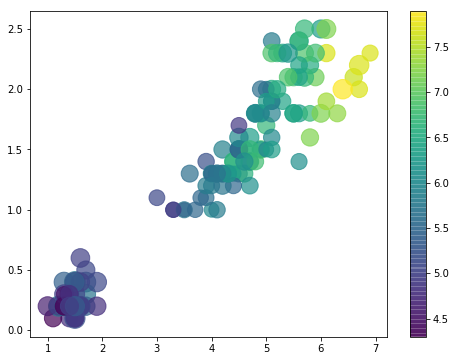

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = pd.read_csv('iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})
x, y = iris['petal_length'],  iris['petal_width']

plt.figure(1, (8., 6.))
plt.subplot(111)
im = plt.scatter(x, y, c=iris.sepal_length, s=100*iris.sepal_width, cmap='viridis', alpha=0.7)
plt.colorbar(im)

plt.show()